# Q1 NoteBook

In [3]:
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils


import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr

import sklearn.cluster as cluster

#classification
from sklearn.neighbors import KNeighborsClassifier


from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

import seaborn as sns
%matplotlib inline

C:\Python27\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Classify points on cycles

Generate data points forming to different cycles

In [2]:
X, y = datasets.make_circles(noise=.1, factor=.5)
print "X.shape:", X.shape
print "unique labels: ", np.unique(y)

X.shape: (100, 2)
unique labels:  [0 1]


Plot the data

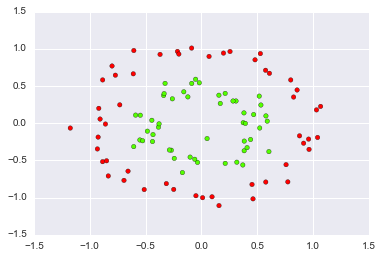

In [3]:
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y)

Take the first 50 examples for training and the rest for testing.

In [4]:
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

Try to classify the points (in the two classes) using a k-nn classifier:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)    # we specify that this knn should always use 5 neighbors

In [6]:
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
print "KNN validation accuracy on test cycles: ", knn.score(X_test, y_test)
y_pred_train = knn.predict(X_train)
print "KNN validation accuracy on training cycles: ", knn.score(X_train, y_train)

KNN validation accuracy on test cycles:  1.0
KNN validation accuracy on training cycles:  0.98


Plot the results

Accuracy of KNN test set: 1.0


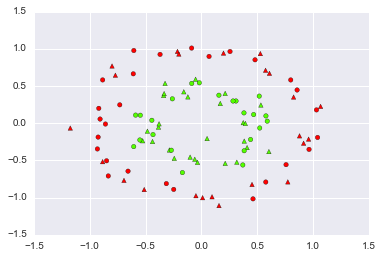

In [7]:
plt.prism() # gives us a nice color map
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
print "Accuracy of KNN test set:", knn.score(X_test, y_test)

## Experimenting with the IRIS dataset:

https://archive.ics.uci.edu/ml/datasets/Iris

Fetching the data in python

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [8]:
iris = datasets.load_iris()

In [9]:
X = iris.data
y = iris.target
ynames = iris.target_names
print X.shape, y.shape
print X[1,:]
print iris.target_names
print y

(150, 4) (150,)
[ 4.9  3.   1.4  0.2]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split the data into training and testing

In [10]:
X, y = utils.shuffle(X, y, random_state=1)
print X.shape
print y.shape
print y

(150, 4)
(150,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1
 2 0]


Split data into training and testing

In [11]:
train_set_size = 100
X_train = X[:train_set_size]  # selects first 100 rows (examples) for train set
y_train = y[:train_set_size]
X_test = X[train_set_size:]   # selects from row 100 until the last one for test set
y_test = y[train_set_size:]
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(100, 4) (100,)
(50, 4) (50,)


Classifying again using k-nearest neighbors:

In [12]:
knn = KNeighborsClassifier(n_neighbors=20)    # we specify that this knn should always use 5 neighbors

In [13]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
print "Accuracy of KNN test set:", knn.score(X_test, y_test)

Accuracy of KNN test set: 0.96


# NMIST dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [4]:
#mnist = fetch_mldata("MNIST original")
digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target

print X_digits.shape, y_digits.shape,  y_digits, digits.target_names
X_digits, y_digits = utils.shuffle(X_digits, y_digits)
print  y_digits

(1797, 64) (1797,) [0 1 2 ..., 8 9 8] [0 1 2 3 4 5 6 7 8 9]
[8 5 7 ..., 3 7 4]


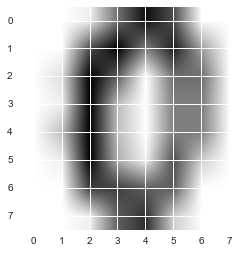

In [5]:
plt.rc("image", cmap="binary") 
plt.imshow(digits.images[10])

This time we use all classes, but only a small training set (because KNN usually takes a while). To do model selection, we also create a valdation set to adjust k

In [6]:
step = 1000;
X_digits_train = X_digits[:step]
y_digits_train = y_digits[:step]
X_digits_test = X_digits[step:len(y_digits)]
y_digits_test = y_digits[step:len(y_digits)]

Using again the k-NN

In [15]:
knn_digits = KNeighborsClassifier(n_neighbors=7)
knn_digits.fit(X_digits_train, y_digits_train)
print "KNN validation accuracy on MNIST digits: ", knn_digits.score(X_digits_test, y_digits_test)

KNN validation accuracy on MNIST digits:  0.978670012547


Looking at the nearest neighbors of some points (for k=3)

In [19]:
knn_digits = KNeighborsClassifier(n_neighbors=2)
knn_digits.fit(X_digits_train, y_digits_train)
y_digits_test_pred = knn_digits.predict(X_digits_test)
print "KNN test accuracy on MNIST digits: ", knn_digits.score(X_digits_test, y_digits_test)

KNN test accuracy on MNIST digits:  0.984943538269


In [20]:
neighbors = knn_digits.kneighbors(X_digits_test, n_neighbors=3, return_distance=False)
print type(neighbors)
print neighbors.shape

<type 'numpy.ndarray'>
(797, 3)


Not let's look at them. Let's start with an image where it worked. First plot the validation image itself, then three neighbors.

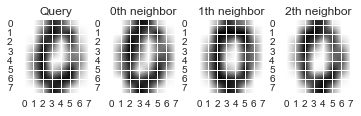

In [21]:
plt.rc("image", cmap="binary")  # this sets a black on white colormap
# plot X_digits_valid[0]
plt.subplot(1, 4, 1)
plt.imshow(X_digits_test[1].reshape(8, 8))
plt.title("Query")
# plot three nearest neighbors from the training set
for i in [0, 1, 2]:
    plt.subplot(1, 4, 2 + i)
    plt.title("%dth neighbor" % i)
    plt.imshow(X_digits_train[neighbors[1, i]].reshape(8, 8)) 

In [23]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()

IOError: [Errno 2] No such file or directory: '../theme/custom.css'